# IBM HR Analytics Employee Attrition & Performance
#### Predict attrition of your valuable employees



## Setup and Exploration

In [113]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [59]:
# load in the dataset into a pandas dataframe, print statistics
ibm = pd.read_csv("ibm.csv") 

In [60]:
ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [61]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [62]:
ibm.shape

(1470, 35)

In [63]:
#change the string to int to improve the analysis 
Attrition={'Yes':1,'No':0}
ibm.Attrition=[Attrition[item] for item in ibm.Attrition]


Gender={'Male':1,'Female':0}
ibm.Gender=[Gender[item] for item in ibm.Gender]


In [64]:
#change the numbers to make it more variable in virtualizatio
Education={1:'Below College',2:'College',3:'Bachelor',4:'Master',5:'Doctor'}
ibm.Education=[Education[item] for item in ibm.Education]

EnvironmentSatisfaction={1:'Low',2:'Medium',3:'High',4:'Very High'}
ibm.EnvironmentSatisfaction=[EnvironmentSatisfaction[item] for item in ibm.EnvironmentSatisfaction]


JobInvolvement={1:'Low',2:'Medium',3:'High',4:'Very High'}
ibm.JobInvolvement=[JobInvolvement[item] for item in ibm.JobInvolvement]

JobSatisfaction={1:'Low',2:'Medium',3:'High',4:'Very High'}
ibm.JobSatisfaction=[JobSatisfaction[item] for item in ibm.JobSatisfaction]


PerformanceRating={1:'Low',2:'Good',3:'Excellent',4:'Outstanding'}
ibm.PerformanceRating=[PerformanceRating[item] for item in ibm.PerformanceRating]

RelationshipSatisfaction={1:'Low',2:'Medium',3:'High',4:'Very High'}
ibm.RelationshipSatisfaction=[RelationshipSatisfaction[item] for item in ibm.RelationshipSatisfaction]

WorkLifeBalance={1:'Bad',2:'Good',3:'Better',4:'Best'}
ibm.WorkLifeBalance=[WorkLifeBalance[item] for item in ibm.WorkLifeBalance]




ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,Very High,80,1,10,3,Better,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,High,80,0,8,3,Better,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,Very High,80,1,6,3,Better,2,2,2,2


In [65]:
# convert some category variable into ordered categorical types
ordinal_var_dict = {'EnvironmentSatisfaction': ['Low','Medium','High','Very High'],
                    'JobInvolvement':['Low','Medium','High','Very High'],
                    'JobSatisfaction':['Low','Medium','High','Very High'],
                    'PerformanceRating': ['Low', 'Good', 'Excellent', 'Outstanding'],
                    'RelationshipSatisfaction':['Low','Medium','High','Very High'],
                    'WorkLifeBalance':['Bad','Good','Better','Best']
                   }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    ibm[var] = ibm[var].astype(ordered_var)

In [66]:
# descriptive statistics for numeric variables
print(ibm.describe())

               Age    Attrition    DailyRate  DistanceFromHome  EmployeeCount  \
count  1470.000000  1470.000000  1470.000000       1470.000000         1470.0   
mean     36.923810     0.161224   802.485714          9.192517            1.0   
std       9.135373     0.367863   403.509100          8.106864            0.0   
min      18.000000     0.000000   102.000000          1.000000            1.0   
25%      30.000000     0.000000   465.000000          2.000000            1.0   
50%      36.000000     0.000000   802.000000          7.000000            1.0   
75%      43.000000     0.000000  1157.000000         14.000000            1.0   
max      60.000000     1.000000  1499.000000         29.000000            1.0   

       EmployeeNumber       Gender   HourlyRate     JobLevel  MonthlyIncome  \
count     1470.000000  1470.000000  1470.000000  1470.000000    1470.000000   
mean      1024.865306     0.600000    65.891156     2.063946    6502.931293   
std        602.024335     0.49006

#### What is the structure of your dataset?

There are 1470 entries in the dataset with 35 features. it's a lot of features that will allow us to do huge investigation. the ordered categorical are ordered factor variables with the following levels.

(worst) ——> (best) 
EnvironmentSatisfaction , RelationshipSatisfaction , JobInvolvement and JobSatisfaction: 'Low','Medium','High' ,'Very High'

PerformanceRating:'Low','Good','Excellent','Outstanding'
WorkLifeBalance: 'Bad','Good','Better', 'Best'
    
#### What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out what features are best for predicting the employee attrition of the ibm company in the dataset.

#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that that low of of each categorical variables like Environment Satisfaction and Job Satisfaction these will have the strongest effect on employee attrition if he/she will leave the work or not.



## Exploratory Analysis and Visualization

### Univariate Exploration
I'll start by looking at the distribution of the main variable of interest: attrition.

<AxesSubplot:xlabel='Attrition'>

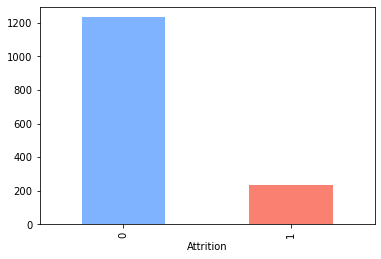

In [67]:
ibm.groupby('Attrition').size().plot(kind='bar',color=['#80B3FF','salmon'])

> most of dataset are not attrition employees

### What is other features distribution  ? 
I will investigate some features 

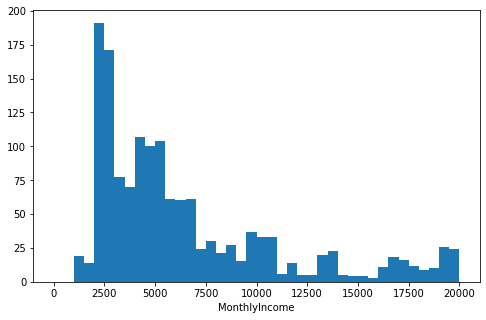

In [68]:
binsize = 500
bins = np.arange(0, ibm['MonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ibm, x = 'MonthlyIncome', bins = bins)
plt.xlabel('MonthlyIncome')
plt.show()

> Most of Employee income is between 2500 to 5000 dollar

<AxesSubplot:>

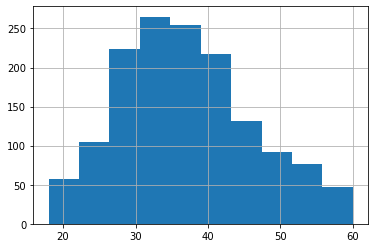

In [69]:
ibm['Age'].hist()

> Most of employeee age between 30 to 40 years 

<AxesSubplot:>

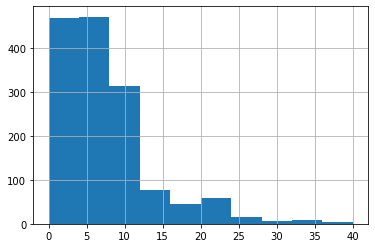

In [70]:
ibm['YearsAtCompany'].hist()

> Most of the employees work in the IBM company form 1 to 10 years and the frequency is 7 years

<AxesSubplot:xlabel='BusinessTravel'>

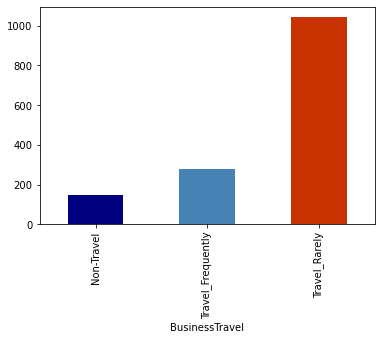

In [71]:
ibm.groupby('BusinessTravel').size().plot(kind='bar',color=['#000080','#4682B4','#C83200'])

There are 3 categories in business travel:
1. No travel (0).
2. Travel Frequently (1).
3. Travel Rarely (2).

Most of IBM employee travel rarey

<AxesSubplot:xlabel='Education'>

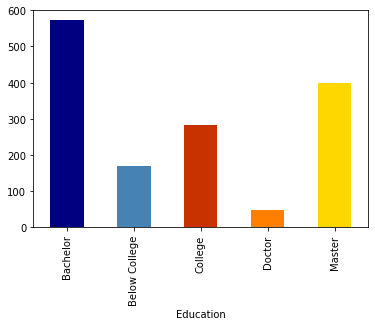

In [72]:
ibm.groupby('Education').size().plot(kind='bar',color=['#000080','#4682B4','#C83200','#FF8000','#FFD700'])


> Most employees have a bachelor's degree

### What is data distribution on ordinal variable's?

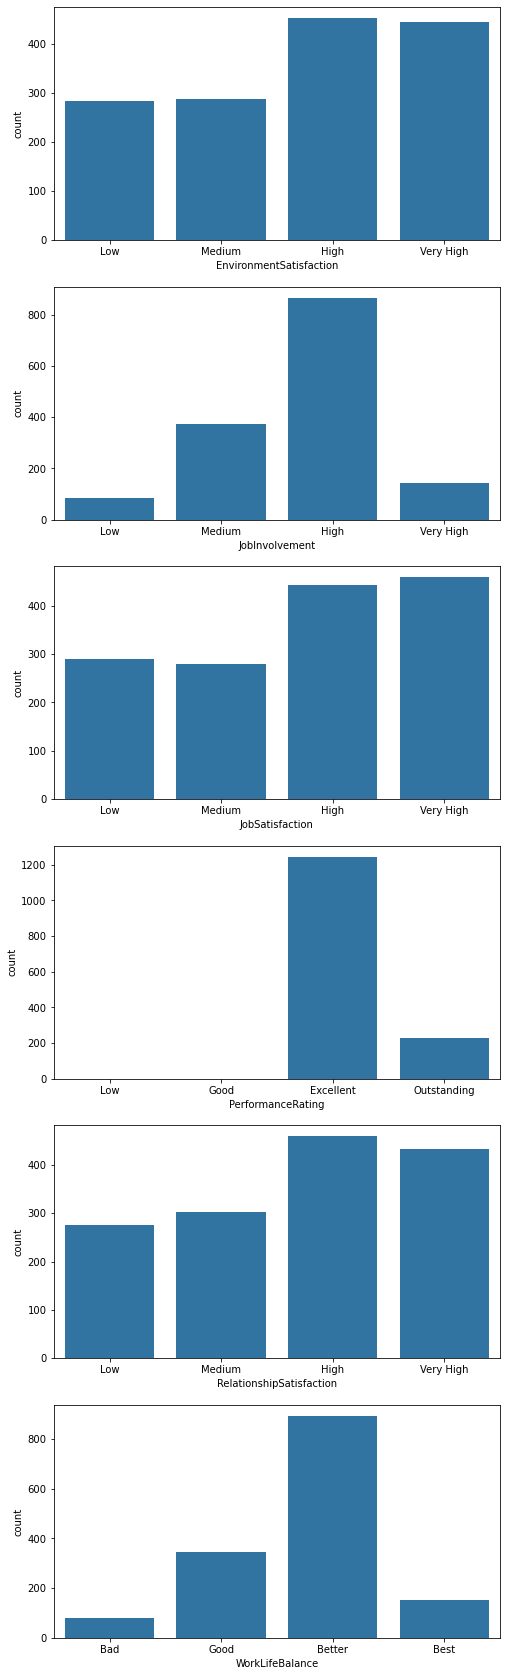

In [73]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=6, figsize = [8,30])

default_color = sns.color_palette()[0]
sns.countplot(data = ibm, x = 'EnvironmentSatisfaction', color = default_color, ax = ax[0])
sns.countplot(data = ibm, x = 'JobInvolvement', color = default_color, ax = ax[1])
sns.countplot(data = ibm, x = 'JobSatisfaction', color = default_color, ax = ax[2])
sns.countplot(data = ibm, x = 'PerformanceRating', color = default_color, ax = ax[3])
sns.countplot(data = ibm, x = 'RelationshipSatisfaction', color = default_color, ax = ax[4])
sns.countplot(data = ibm, x = 'WorkLifeBalance', color = default_color, ax = ax[5])

plt.show()

Besed on above graph it's seems the IBM work enviroment is prefect becase most of employees preformance is excellent and the balance between the work and live is great. Also, the Environment Satisfaction , Job Involvement , Job Satisfaction and Relationship Satisfaction is high. 


### What about attribute that related to years ?

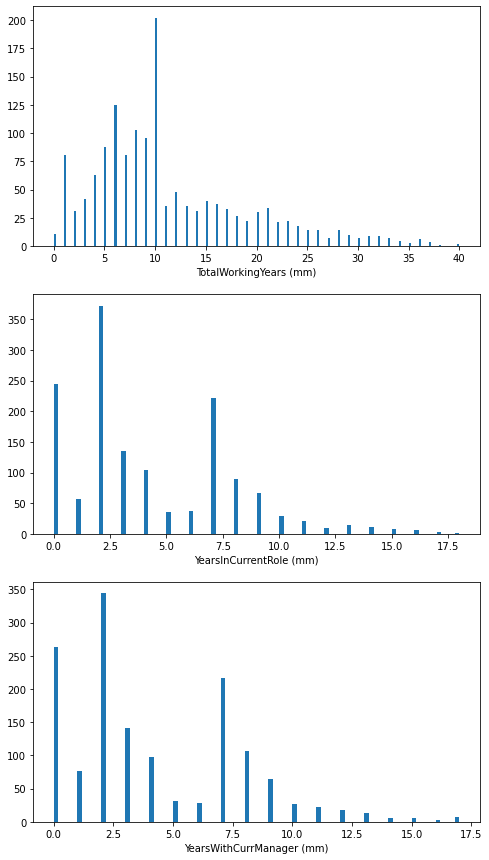

In [74]:
fig, ax = plt.subplots(nrows=3, figsize = [8,15])

variables = ['TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(ibm[var]), max(ibm[var])+0.2, 0.2)
    ax[i].hist(data = ibm, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))

plt.show()

The years with the current manager and current role is between three or seven years. Also, the total working years of most employees is 10 year.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
I will focus on attrition feature , i will try to find what is the other featurs that effect the attrition but until now every thing looks normal. the data is good quality.


### Bivariate Exploration


In [26]:
numeric_vars = ['Age','MonthlyIncome','YearsAtCompany']
categoric_vars = ['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']

In [27]:
ibm_corr = ibm.corr()

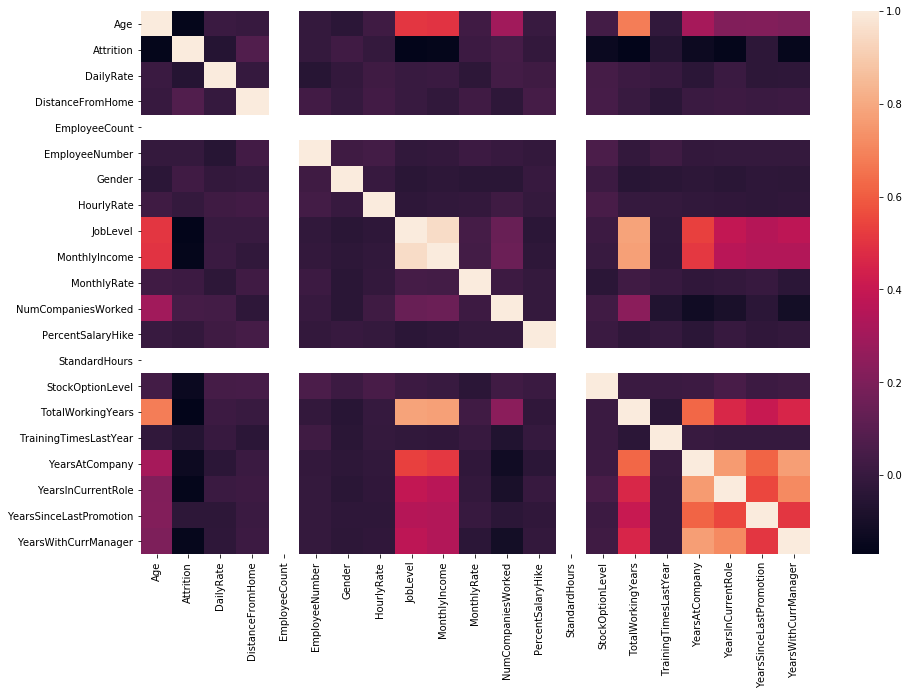

In [28]:
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(ibm_corr,xticklabels=ibm_corr.columns,yticklabels=ibm_corr.columns)

#### Main findings from correlation 
1. Monthly income is highly correlated with Job level.
2. Job level is highly correlated with total working hours.
3. Monthly income is highly correlated with total working hours.
4. Age is also positively correlated with the Total working hours.

#### What are the most factors that effect on attrition?
Now we will try some of them

#### Business Travel vs Attrition

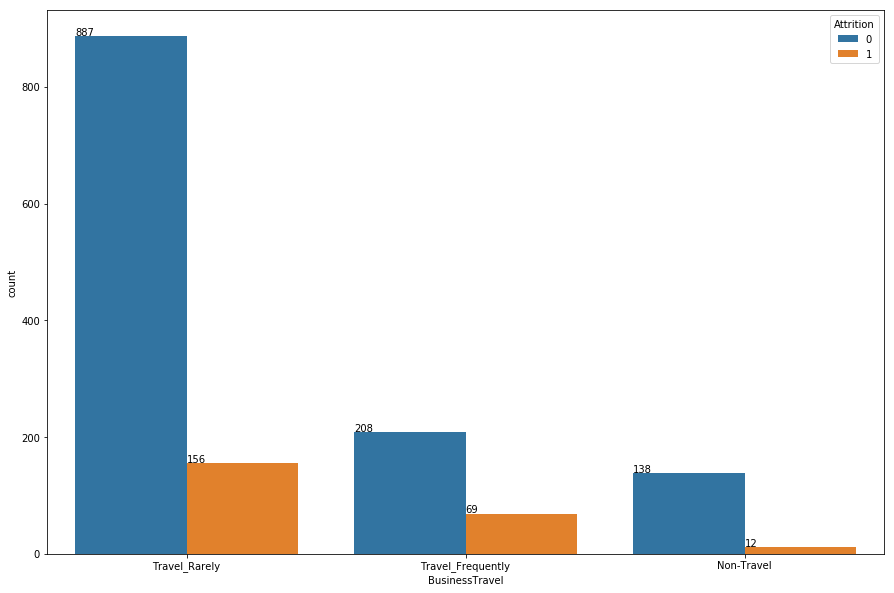

In [29]:
ax = sns.countplot(x="BusinessTravel", hue="Attrition", data=ibm)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))
    
# Attrition: No = 0 and Yes = 1

> the plot shows the business travel is not major factor that will effect on Attrition but we can say Employee who travel rarely are likely to quit more.

#### Department Vs Attrition

The departments:
Human Resources: 0
Research & Development: 1
Sales: 2

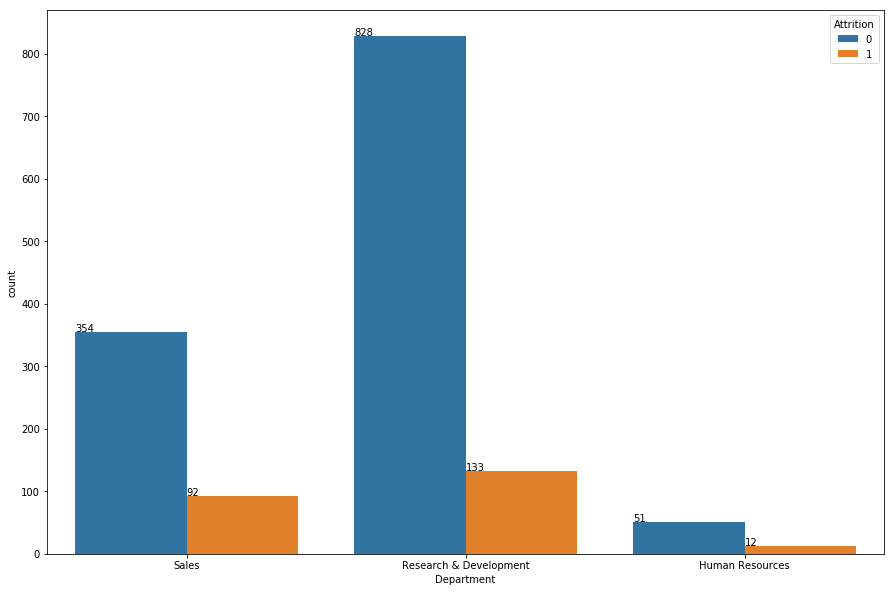

In [30]:
ax = sns.countplot(x="Department", hue="Attrition", data=ibm)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

> The plot shows the employess from research and development department are likely to quit then the sales depatment

#### Monthly Income vs Attrition

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


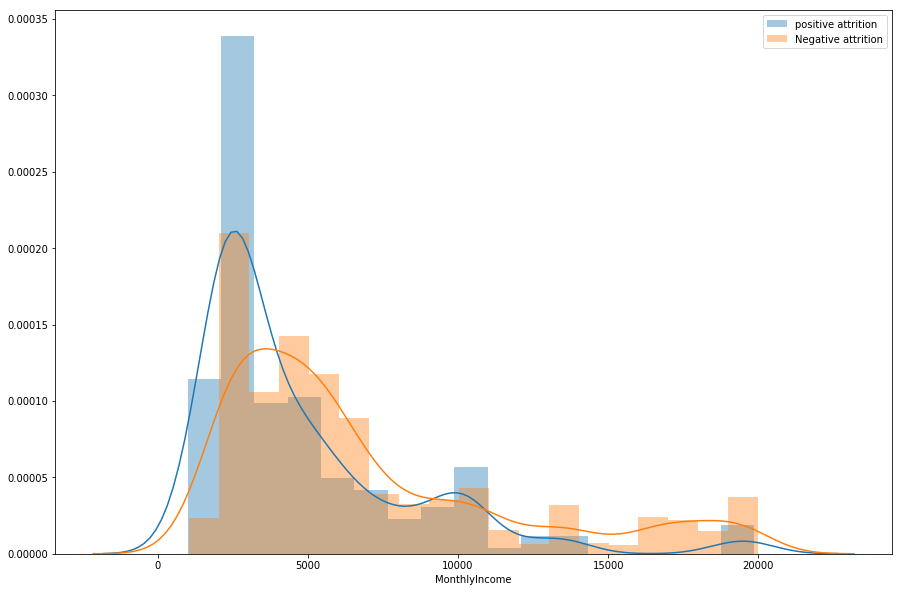

In [31]:
positive = ibm.loc[ibm['Attrition'] == 1]
negative = ibm.loc[ibm['Attrition'] == 0]

sns.distplot(positive['MonthlyIncome'], label='positive attrition')
sns.distplot(negative['MonthlyIncome'], label='Negative attrition')
plt.legend()

> Plot shows employees who's get less monthly income are more likely to leave. 

#### Education vs Attrition

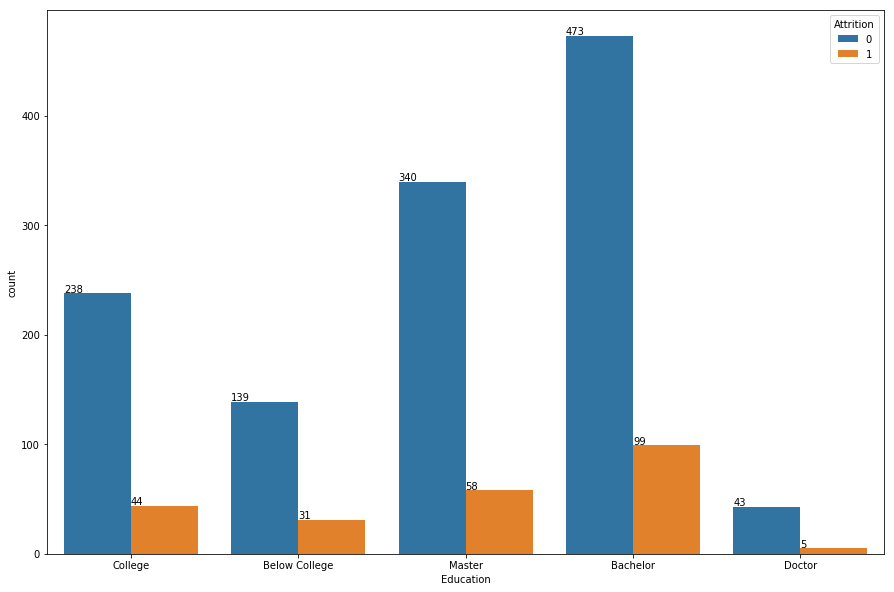

In [32]:
ax = sns.countplot(x="Education", hue="Attrition", data=ibm)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

> Most of employee who have Bachelor degree are more likely to quit then the employee with Master degree

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Yes, in general Bivariate Exploration is show some more interseting relationships like the Monthly Income vs Attrition and Business Travel vs Attrition. they are main factors effect on attrition employee.  




## Multivariate Exploration

### what is the relationships between more than two varibales?

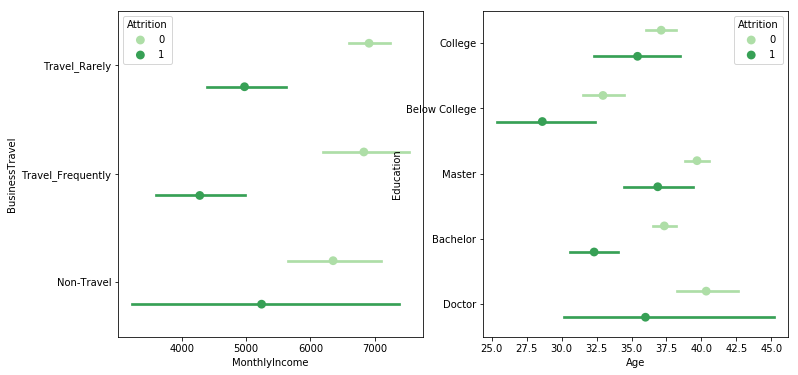

In [34]:
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])

sns.pointplot(data = ibm, x = 'MonthlyIncome', y = 'BusinessTravel', hue = 'Attrition',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[0])
ax[0].set_yticklabels([],minor = True)


sns.pointplot(data = ibm, x = 'Age', y = 'Education', hue = 'Attrition',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[1])
ax[1].set_yticklabels([],minor = True)
plt.show();

> In the first plot shwos the relation between MonthlyIncome , BusinessTravel and Attrition which is the employee who's not travel and there salary monthly income less than 5500 are more likely to quit.


> In the Secoend plot shows there is high possiblity to leave the company for:
- bachelor employee with 32.5 years old, 
- Doctor empoyee whith 36 years old.

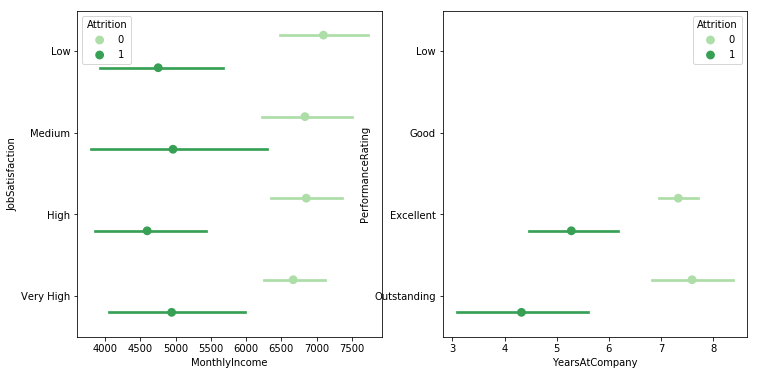

In [38]:
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])

sns.pointplot(data = ibm, x = 'MonthlyIncome', y = 'JobSatisfaction', hue = 'Attrition',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[0])
ax[0].set_yticklabels([],minor = True)


sns.pointplot(data = ibm, x = 'YearsAtCompany', y = 'PerformanceRating', hue = 'Attrition',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[1])
ax[1].set_yticklabels([],minor = True)
plt.show();

> In the first plot shwos the relation between MonthlyIncome , JobSatisfaction and Attrition and the rate of attrition is increse for who's salary between 4000 and 6000. Also there is no effect from JobSatisfaction

> In the second plot the relation is between YearsAtCompany ,PerformanceRating and Attrition. The rete of attrition is increse for who work between 3 to 6 years and their preformance is high.

Multivariate Exploration is not the perfect exploration way for this case , beaces I'm fouc only on what the others factors are effect the employee attrition.